Problem 3: Sentiment Analysis
The IMDB large movie review dataset has many positive and negative reviews on movies. Download the dataset here (http://ai.stanford.edu/~amaas/data/sentiment/). Check the README file as it provides a description of the dataset. Use the provided training and testing data for your network. You would need to go through data preprocessing to prepare the data for NLP. Then, create a network to classify the review as positive or negative.

All choices are up to you and many resources exist online to help you make good design choices. While you can check online resources, you should not copy other’s code! Using a pretrained network or training a network that already exists is not allowed. Any act of plagiarism will be escalated. Make sure you understand and support any preprocessing steps and design decisions in your report.

In [3]:
# Importing Libraries
from tensorflow.keras.utils import get_file
import tarfile
from glob import glob
import os,re,string
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# Plotting Loss
def plot_loss(history):
  plt.plot(history.history['val_loss'],label="val loss")
  plt.plot(history.history['loss'],label="train loss")
  plt.xlabel('epoch')
  plt.ylabel('loss')

  plt.legend()
  plt.show()

# Plotting Accuracy
def plot_accuracy(history):
  plt.plot(history.history['val_acc'],label="val accuracy")
  plt.plot(history.history['acc'],label="train accuracy")
  plt.xlabel('epoch')
  plt.ylabel('accuracy')

  plt.legend()
  plt.show()

In [5]:
# Downloading Data
data_dir = get_file('aclImdb_v1.tar.gz', 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', cache_subdir = "datasets",hash_algorithm = "auto", extract = True, archive_format = "auto")
my_tar = tarfile.open(data_dir)
my_tar.extractall('./data/') # specify which folder to extract to
my_tar.close()

84131840/84125825 [==============================] - 2s 0us/step


In [6]:
# Extracting data from downloaded files
from glob import glob
import os,re,string
import numpy as np
PATH='./data/aclImdb/'
names = ['neg','pos']

def load_texts_labels_from_folders(path, folders):
    texts,labels = [],[]
    for idx,label in enumerate(folders):
        for fname in glob(os.path.join(path, label, '*.*')):
            texts.append(open(fname, 'r').read())
            labels.append(idx)
    
    return texts, np.array(labels).astype(np.int64)

x_train,y_train = load_texts_labels_from_folders(f'{PATH}train',names)
x_test,y_test = load_texts_labels_from_folders(f'{PATH}test',names)

In [7]:
# Pre-processing of the data
def preprocess_reviews(reviews):
    tokens = re.compile("[.;:!#\'?,\"()\[\]]|(<br\s*/><br\s*/>)|(\-)|(\/)")
    
    return [tokens.sub("", line.lower()) for line in reviews]

x_train_clean = preprocess_reviews(x_train)
x_test_clean = preprocess_reviews(x_test)

In [8]:
# sample review
x_train_clean[0]

'star rating ***** saturday night **** friday night *** friday morning ** sunday night * monday morning alice having defeated freddy at the end of the last film is now trying to readjust her life but her unborn child is carrying a demonous presence freddy trying to come out into their world againits interesting to note the directors who got their big breaks directing freddy films charles russell eraser the mask renny harlin the long kiss goodnight cutthroat island cliffhanger die hard 2 and here stephen hopkins lost in space predator 2 but while russell and harlin made a good job of it hopkins imo has made something of a podge with this entry that should be quickly forgottenthe story is clearly being stretched as far as it can go here with freddy ludicrously a father himself and the ridiculous looking demon baby even at about an hour and a half it all gets rather tiresome and of course not scary at allthe bon appetit bitch catchphrase is the only memorable point of this other wise very

In [9]:
# Tokeniser
import tensorflow as tf
from tensorflow import keras
tok = keras.preprocessing.text.Tokenizer()
tok.fit_on_texts(x_train_clean) 
X_train = tok.texts_to_sequences(x_train_clean)
X_test = tok.texts_to_sequences(x_test_clean)

In [10]:
from sklearn.model_selection import train_test_split
X_train = keras.preprocessing.sequence.pad_sequences(X_train,padding='post',maxlen=1000)
X_test = keras.preprocessing.sequence.pad_sequences(X_test,padding='post',maxlen=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [11]:
# Building Model
# input shape is the vocabulary count used for the movie reviews (10,000 words)
word_size = len(tok.word_index)+1

model = keras.Sequential()
model.add(keras.layers.Embedding(word_size, 16))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv1D(filters=16,kernel_size=2,padding='valid',activation='relu'))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          2284368   
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          528       
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [13]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_val, y_val),verbose=1,batch_size=512)

Epoch 1/20
35/35 [==============================] - 11s 278ms/step - loss: 0.6931 - acc: 0.5018 - val_loss: 0.6929 - val_acc: 0.5399
Epoch 2/20
35/35 [==============================] - 10s 273ms/step - loss: 0.6926 - acc: 0.5278 - val_loss: 0.6917 - val_acc: 0.6228
Epoch 3/20
35/35 [==============================] - 10s 273ms/step - loss: 0.6893 - acc: 0.5649 - val_loss: 0.6836 - val_acc: 0.6679
Epoch 4/20
35/35 [==============================] - 10s 276ms/step - loss: 0.6730 - acc: 0.6611 - val_loss: 0.6559 - val_acc: 0.6977
Epoch 5/20
35/35 [==============================] - 10s 274ms/step - loss: 0.6296 - acc: 0.7326 - val_loss: 0.5970 - val_acc: 0.7781
Epoch 6/20
35/35 [==============================] - 10s 274ms/step - loss: 0.5543 - acc: 0.7930 - val_loss: 0.5180 - val_acc: 0.8215
Epoch 7/20
35/35 [==============================] - 10s 274ms/step - loss: 0.4738 - acc: 0.8255 - val_loss: 0.4452 - val_acc: 0.8489
Epoch 8/20
35/35 [==============================] - 10s 275ms/step - 

In [16]:
model.save('./models/Group25_NLP_model.h5')

In [18]:
model=tf.keras.models.load_model('./models/Group25_NLP_model.h5')

In [22]:
scores = model.evaluate(X_test,y_test)
test_accuracy = scores[1]
print('accuracy on testing set:',test_accuracy*100)

782/782 [==============================] - 3s 4ms/step - loss: 0.3356 - acc: 0.8590
accuracy on testing set: 85.9000027179718


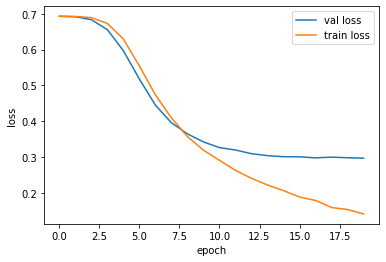

In [20]:
plot_loss(history)

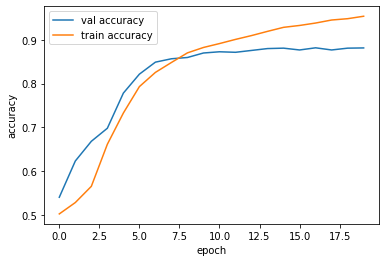

In [21]:
plot_accuracy(history)